# PIPELINE
- ** Data representation is very important in any ML **
- ** Data Scaling, Combining Features by hand, Learning Features using unsupervised ML **
- ** So ML applications require applications of many steps, algorithms etc.**
- ** PIPELINE class simply the process of chaining of transformations and models **
- ** Combine PIPELINE and GridSearchCV to search parameters over all processing steps at once **

# <span style='color:red'>Example of data preprocessing in Cancer Dataset </span>

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import mglearn1
%matplotlib inline

In [2]:
cancer=load_breast_cancer()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [7]:
scaler=MinMaxScaler().fit(X_train)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
svm=SVC()

In [16]:
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
print('Test Score :{:.3f}'.format(svm.score(X_test_scaled,y_test)))

Test Score :0.951


# <span style='color:brown'>Parameter Selection with Preprocessing</span>

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
# Use the same NAIE approach as we did before
param_grid ={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)

In [21]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
print('Best Cross Validation score :{:.2f}'.format(grid.best_score_))
print('Best Test Score : {:.2f}'.format(grid.score(X_test_scaled,y_test)))
print('Best Parameters :',grid.best_params_)

Best Cross Validation score :0.98
Best Test Score : 0.90
Best Parameters : {'C': 1, 'gamma': 1}


# Note:-
- In the above Cross Validation process, we have used the split data into TRAINING and TESTING
- We scaled data of TRAINING set 
- We split Training set into multople splits and each split has further TRAINING set and TEST set with the same SCALED range of MIN and MAX
- We train model using traing set, select parameters using test split in the CROSS VALIDATION process
- In the real world we don't get the type of test set with the same SCALED range
- In the real world scenario the TEST data will not have been used to scale TRAINING Dataset to train the model


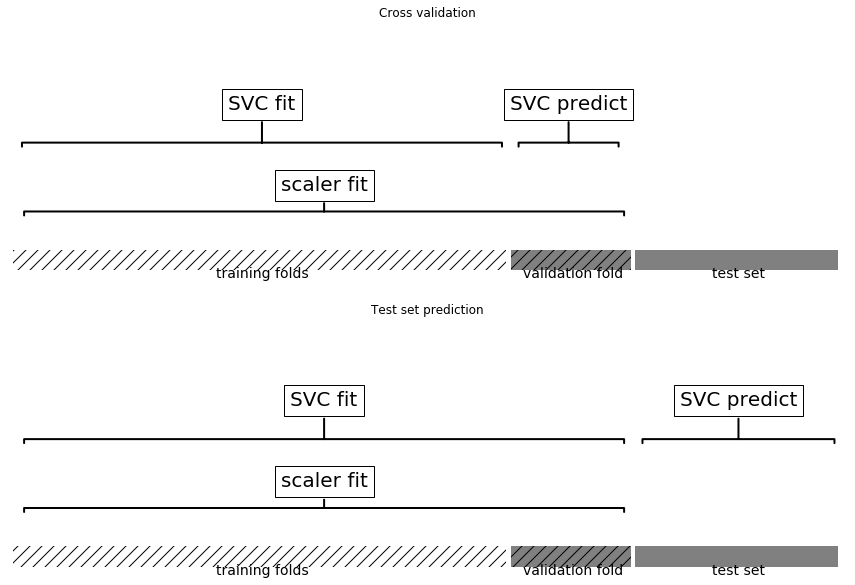

In [30]:
mglearn1.plots.plot_improper_processing()

In [52]:
import numpy as np
from sklearn.feature_selection import SelectPercentile,f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# illustration Information Leakage
- **step 1 **
- We generate random numbers from gaussian population ofthe size 100X100000 for X and 100 for y
- There is no relationship so we expect we can't learn between X and y
- But we select the top best 5 percent of features those have some correlation with y
- run the cross validation using ridge and we can see good value in $R^2$ 
- This is because we got 5 % features covering both traininga nd test set in the Cross Validation , so already Test has got information already fatored in the model
- **step 2**
- We introduce PIPELINE and run CV in the whole range 
- CV includes Training and TEST dataset and parameters are selected from TRAINING only and not from TEST set
- So Test set while testing the model doesn't find model already factored with parameters that TEST would have as in step 1

In [33]:
rnd=np.random.RandomState(seed=0)

In [35]:
X= rnd.normal(size=(100,10000))
y=rnd.normal(size=(100))

# <span style='color:red'>STEP :1</span>

In [42]:
select=SelectPercentile(score_func=f_regression,percentile=5).fit(X,y)

In [43]:
X_selected=select.transform(X)

In [51]:
print('Cross validation accuracy (cv only on ridge) :{:.2f}'.format(np.mean(cross_val_score(Ridge(),X_selected,y,cv=5))))

Cross validation accuracy (cv only on ridge) :0.91


# <span style='color:blue'>STEP:2</span>

In [53]:
pipe=Pipeline([('select',SelectPercentile(score_func=f_regression,percentile=5)),('ridge',Ridge())])

In [54]:
print('Cross Validation accuracy (Pipeline):{:.2f}'.format(np.mean(cross_val_score(pipe,X,y,cv=5))))

Cross Validation accuracy (Pipeline):-0.12


# <span style='color:purple'>PIPELINE Interface: General</span>
- Along with data preprocessing Pipeline class can join any number of ESTIMATORS together (e.g. feature extraction, feature selection, scaling, classification/regression/clustering)
- estimators call fit and transform and pass on to the next estimator
- last step fits

# <span style='color:red'>Convenient pipeline creation with make_pipeline</span>

In [55]:
from sklearn.pipeline import make_pipeline

In [58]:
pipe_long = Pipeline([('scaler',MinMaxScaler()),('svm',SVC(C=100))])

In [59]:
pipe_short=make_pipeline(MinMaxScaler,SVC(C=100))

In [60]:
pipe_short.named_steps

{'svc': SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False), 'type': sklearn.preprocessing.data.MinMaxScaler}

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [65]:
pipe=make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())

In [66]:
pipe.named_steps

{'pca': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'standardscaler-1': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler-2': StandardScaler(copy=True, with_mean=True, with_std=True)}

# Accessing step attributes
- how to access attributes of steps such as coefficients of linear model or n components of PCA
- Access using named_steps
- Example Cancer dataset

In [68]:
pipe.fit(cancer.data)

Pipeline(steps=[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [70]:
components = pipe.named_steps['pca'].components_

In [71]:
print('Component shape is :{}'.format(components.shape))

Component shape is :(2, 30)


# Accessing Attributes in a GRID-Searched Pipeline

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [106]:
import matplotlib.pyplot as plt

In [73]:
pipe=make_pipeline(StandardScaler(),LogisticRegression())

In [74]:
param_grid ={'logisticregression__C':[0.01,0.1,1,10,100]}

In [77]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=4)

In [78]:
grid=GridSearchCV(pipe,param_grid,cv=5)

In [79]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [83]:
print('logistic regression step :\n{}'.format(grid.best_estimator_.named_steps['logisticregression']))

logistic regression step :
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [84]:
print('Logistics Regression Coefficients :\n{}'.format(grid.best_estimator_.named_steps['logisticregression'].coef_))

Logistics Regression Coefficients :
[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


# <span style='color:green'>Grid-Searching preprocessing steps and model parameters</span>
- Boston dataset
- use scaling, poly nomial with some degree and ridge regressor
- model that using pipeline (three steps - scaling, polynomial features and ridge regression)

In [131]:
from sklearn.datasets import load_boston

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
boston=load_boston()

In [134]:
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

In [135]:
pipe=make_pipeline(MinMaxScaler(),PolynomialFeatures(),Ridge())

In [136]:
param_grid={'polynomialfeatures__degree':[1,2,3],'ridge__alpha':[0.001,0.01,0.1,1,10,100]}

In [137]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)

In [138]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

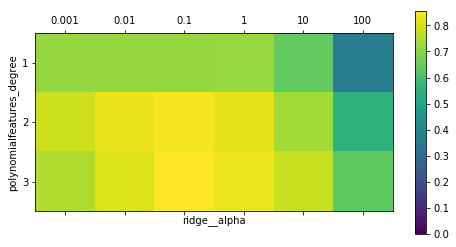

In [139]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0,cmap='viridis')
plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfeatures_degree')
plt.xticks(range(len(param_grid['ridge__alpha'])),param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [141]:
print('Best parameters :{}'.format(grid.best_params_))

Best parameters :{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1}


In [142]:
print('Test Score :{:.3f}'.format(grid.score(X_test,y_test)))

Test Score :0.790


# Now lets run a grid without polynomial features

In [143]:
param_grid={'ridge__alpha':[0.001,0.01,0.1,1,10,100]}

In [144]:
pipe = make_pipeline(StandardScaler(),Ridge())

In [145]:
grid=GridSearchCV(pipe,param_grid,cv=5)

In [146]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [147]:
print('Test score without polynomial :{:.2f}'.format(grid.score(X_test,y_test)))

Test score without polynomial :0.63


# Grid-Searching which model to use
- Go beyond GridSearchCV + Pipeline ==> Analyze and search steps being performed in the Pipeline (e.g. Whether to use StandardScaler or MinMaxScaler)
- Trying all possible solutions is usually not a viable ML strategy
- Scenario to compare RandomForestClassifier and SVC on iris dataset
- SVC --> might need data to be scaled but not RFC, for SVC which one to apply to scale -> MinMaxScaler or StandardScaler
- We define pipeline , steps (a) Preprocessing (b) Classifier
- We instantiate the pipeline using SVC and StandardScaler
- Then create parameter grid with various options

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
pipe = Pipeline([('preprocessing',StandardScaler()),('classifier',SVC())])

In [163]:
param_grid = [{'classifier':[SVC()],'preprocessing':[StandardScaler(),None],'classifier__gamma':[0.001,0.01,0.1,1,10,100],
             'classifier__C':[0.001,0.01,0.1,1,10,100]},
            {'classifier':[RandomForestClassifier(n_estimators=100)],'preprocessing':[None],'classifier__max_features':[1,2,3]}]

In [164]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [167]:
grid=GridSearchCV(pipe,param_grid,cv=5,n_jobs=-1)

In [168]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'classifier': [SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'preprocessing': [StandardScaler(copy=True, with_...     verbose=0, warm_start=False)], 'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [171]:
print('Best test score :\n{:.2f} '.format(grid.score(X_test,y_test)))

Best test score :
0.98 


In [173]:
print('best parameters :\n{}'.format(grid.best_estimator_))

best parameters :
Pipeline(steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


In [175]:
print('Best Parameters :\n{}'.format(grid.best_params_))

Best Parameters :
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [177]:
print('Best Cross Validation Score :\n{:.2f}'.format(grid.best_score_))

Best Cross Validation Score :
0.99


# <span style='color:blue'>Summary & Conclusion:-</span>
- Pipeline method simplify data preprocessing , modeling sequncing steps
- Pipline becomes very handy while running cross validation to test various models with varying parameters
- Pipline(sequncing of model building steps) + Grid Search (evaluation models on parameters) ==> SUCCINT CODE with no MANUAL ERROR Scope